In [1]:
# STANDARD
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# SKYLEARN
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

# DUMMY ENCODING
import warnings
warnings.simplefilter('ignore')

In [2]:
# Read CSV, zero all NaN
data = pd.read_csv('data/all_data.csv')
data = data.fillna(0)
data.head()

,Date,CS_Mnth,CS_Qtr,CS_Ann,CD_Mnth,CD_Qtr,CD_Ann,Enrgy_Mnth,Enrgy_Qtr,Enrgy_Ann,...,PPI_Commodity,Imp_Exp _Indx,haircut_price,cardboard_pice,Superbowl,Cosmetics_index,bodies,unidentified_bodies,underwear,beer_prct_change
0,12/1/1998,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,...,0.0,91.0,102.7,166.5,AFC,160.8,2.0,17,0.0,0.8
1,1/1/1999,0.0580,0.0000,0.0,0.0333,0.0000,0.0,-0.0013,0.0000,0.0,...,0.0,91.3,103.0,165.0,AFC,162.1,3.0,24,0.0,-1.1
2,2/1/1999,-0.0143,0.0000,0.0,0.0550,0.0000,0.0,-0.0631,0.0000,0.0,...,0.0,91.2,103.3,164.5,AFC,162.1,1.0,17,0.0,0.6
3,3/1/1999,-0.0208,0.0211,0.0,-0.0136,0.0753,0.0,-0.0064,-0.0704,0.0,...,0.0,91.5,103.7,164.6,AFC,163.6,1.0,16,0.0,-0.6
4,4/1/1999,0.0112,-0.0240,0.0,0.0563,0.0992,0.0,0.1363,0.0577,0.0,...,0.0,92.4,103.9,171.3,AFC,163.0,4.0,19,0.0,3.4


In [3]:
# NFL column to numeric data
nfl = []

for x in data["Superbowl"]:
    if x == 'AFC':
        fb = 0
        nfl.append(fb)
    elif x == 'AFL':
        fb = 1
        nfl.append(fb)
    elif x == 'NFC':
        fb = 2
        nfl.append(fb)
    
data["Superbowl"] = nfl

In [4]:
data.head(84)

,Date,CS_Mnth,CS_Qtr,CS_Ann,CD_Mnth,CD_Qtr,CD_Ann,Enrgy_Mnth,Enrgy_Qtr,Enrgy_Ann,...,PPI_Commodity,Imp_Exp _Indx,haircut_price,cardboard_pice,Superbowl,Cosmetics_index,bodies,unidentified_bodies,underwear,beer_prct_change
0,12/1/1998,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,91.0,102.7,166.5,0,160.8,2.0,17,0.0,0.8
1,1/1/1999,0.0580,0.0000,0.0000,0.0333,0.0000,0.0000,-0.0013,0.0000,0.0000,...,0.0,91.3,103.0,165.0,0,162.1,3.0,24,0.0,-1.1
2,2/1/1999,-0.0143,0.0000,0.0000,0.0550,0.0000,0.0000,-0.0631,0.0000,0.0000,...,0.0,91.2,103.3,164.5,0,162.1,1.0,17,0.0,0.6
3,3/1/1999,-0.0208,0.0211,0.0000,-0.0136,0.0753,0.0000,-0.0064,-0.0704,0.0000,...,0.0,91.5,103.7,164.6,0,163.6,1.0,16,0.0,-0.6
4,4/1/1999,0.0112,-0.0240,0.0000,0.0563,0.0992,0.0000,0.1363,0.0577,0.0000,...,0.0,92.4,103.9,171.3,0,163.0,4.0,19,0.0,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,7/1/2005,-0.0193,-0.0151,-0.0125,-0.0045,-0.0105,0.0394,0.0618,0.0249,0.4085,...,0.0,110.5,124.4,216.8,0,171.0,11.0,41,103.5,-0.3
80,8/1/2005,0.0289,0.0280,0.0755,0.0531,0.0871,0.1403,0.0744,0.1810,0.4714,...,0.0,112.1,124.5,216.4,0,171.9,12.0,28,103.4,0.8
81,9/1/2005,-0.0162,-0.0073,0.0363,-0.0331,0.0136,0.1073,0.0728,0.2238,0.6031,...,0.0,114.4,124.8,213.1,0,172.0,8.0,27,103.4,1.1
82,10/1/2005,0.0030,0.0153,0.0711,-0.0283,-0.0106,0.0445,0.0536,0.2143,0.5421,...,0.0,114.5,124.9,212.9,0,172.7,12.0,26,103.5,1.0


In [5]:
plots_data=data.drop(['Date'], axis=1)

In [6]:
input_cols=['CS_Mnth','CS_Qtr', 'CS_Ann', 'CD_Mnth', 'CD_Qtr', 'CD_Ann',
       'Enrgy_Mnth', 'Enrgy_Qtr', 'Enrgy_Ann', 'Fncl_Mnth', 'Fncl_Qtr',
       'Fncl_Ann', 'HlthC_Mnth', 'HlthC_Qtr', 'HlthC_Ann', 'Indstrl_Mnth',
       'Indstrl_Qtr', 'Indstrl_Ann', 'Mtrls_Mnth', 'Mtrls_Qtr', 'Mtrls_Ann',
       'Tech_Mnth', 'Tech_Qtr', 'Tech_Ann', 'Util_Mnth', 'Util_Qtr',
       'Util_Ann', 'Unempl', 'Jobs_Non-Farm (000s)', 'Hrly_Wages', 'CPI_urban',
       'PPI_Commodity', 'Imp_Exp _Indx', 'haircut_price', 'cardboard_pice',
       'Superbowl', 'Cosmetics_index', 'bodies', 'unidentified_bodies',
       'underwear', 'beer_prct_change']
input_df=plots_data[input_cols]
target_df=plots_data['CS_Mnth']
predicted=[]
from sklearn.tree import DecisionTreeRegressor
initial_train=84
num_runs=len(input_df)-initial_train
for each_cycle in range(num_runs):
    dtr=DecisionTreeRegressor()
    dtr.fit(input_df.iloc[:initial_train+each_cycle, :], target_df[1:initial_train+1+each_cycle])
    prediction=dtr.predict([input_df.iloc[initial_train+each_cycle, :]])
    print(f'Predict: {prediction} when actual is {target_df[initial_train+each_cycle]}')
    predicted.append(prediction)

Predict: [-0.0131] when actual is 0.0116
Predict: [0.0252] when actual is -0.0123
Predict: [-0.0379] when actual is -0.0021
Predict: [-0.0049] when actual is 0.0168
Predict: [0.0289] when actual is 0.0042
Predict: [0.0059] when actual is 0.0059
Predict: [-0.0004] when actual is -0.0004
Predict: [-0.0262] when actual is 0.0151
Predict: [0.0169] when actual is 0.0169
Predict: [0.0056] when actual is 0.0385
Predict: [0.0059] when actual is -0.0156
Predict: [0.0248] when actual is 0.0262
Predict: [0.003] when actual is -0.0066
Predict: [-0.0159] when actual is 0.0148
Predict: [0.0059] when actual is 0.0253
Predict: [-0.0296] when actual is -0.0348
Predict: [0.0289] when actual is 0.0322
Predict: [-0.0159] when actual is 0.0285
Predict: [-0.0066] when actual is 0.0153
Predict: [0.0059] when actual is -0.0245
Predict: [0.0208] when actual is -0.0251
Predict: [0.] when actual is 0.0223
Predict: [-0.031] when actual is 0.0318
Predict: [-0.0066] when actual is 0.0215
Predict: [0.0305] when actu

In [7]:
names=['CS_Mnth','CD_Mnth','Enrgy_Mnth','Fncl_Mnth','HlthC_Mnth','Indstrl_Mnth',
       'Mtrls_Mnth','Tech_Mnth','Util_Mnth']
# Names = pd.DataFrame(names, Columns = ['names'])

In [8]:
print(input_df.iloc[:5, :])

   CS_Mnth  CS_Qtr  CS_Ann  CD_Mnth  CD_Qtr  CD_Ann  Enrgy_Mnth  Enrgy_Qtr  \
0   0.0000  0.0000     0.0   0.0000  0.0000     0.0      0.0000     0.0000   
1   0.0580  0.0000     0.0   0.0333  0.0000     0.0     -0.0013     0.0000   
2  -0.0143  0.0000     0.0   0.0550  0.0000     0.0     -0.0631     0.0000   
3  -0.0208  0.0211     0.0  -0.0136  0.0753     0.0     -0.0064    -0.0704   
4   0.0112 -0.0240     0.0   0.0563  0.0992     0.0      0.1363     0.0577   

   Enrgy_Ann  Fncl_Mnth  ...  PPI_Commodity  Imp_Exp _Indx  haircut_price  \
0        0.0     0.0000  ...            0.0           91.0          102.7   
1        0.0    -0.0127  ...            0.0           91.3          103.0   
2        0.0     0.0337  ...            0.0           91.2          103.3   
3        0.0     0.0078  ...            0.0           91.5          103.7   
4        0.0     0.0311  ...            0.0           92.4          103.9   

   cardboard_pice  Superbowl  Cosmetics_index  bodies  unidentified_

In [9]:
print(target_df[1:5+1])

1    0.0580
2   -0.0143
3   -0.0208
4    0.0112
5   -0.0363
Name: CS_Mnth, dtype: float64


In [10]:
print(input_df.iloc[5, :])

CS_Mnth                     -0.0363
CS_Qtr                      -0.0457
CS_Ann                       0.0000
CD_Mnth                      0.0228
CD_Qtr                       0.0657
CD_Ann                       0.0000
Enrgy_Mnth                   0.1472
Enrgy_Qtr                    0.2951
Enrgy_Ann                    0.0000
Fncl_Mnth                    0.0691
Fncl_Qtr                     0.1110
Fncl_Ann                     0.0000
HlthC_Mnth                   0.0480
HlthC_Qtr                    0.0719
HlthC_Ann                    0.0000
Indstrl_Mnth                 0.1446
Indstrl_Qtr                  0.1665
Indstrl_Ann                  0.0000
Mtrls_Mnth                   0.2496
Mtrls_Qtr                    0.2790
Mtrls_Ann                    0.0000
Tech_Mnth                   -0.0133
Tech_Qtr                    -0.0303
Tech_Ann                     0.0000
Util_Mnth                    0.0956
Util_Qtr                    -0.0100
Util_Ann                     0.0000
Unempl                      

In [11]:
predictions = []
for i in range (len(predicted)):
    x = predicted[i][0]
    predictions.append(x)

In [12]:
Date = (data['Date'][initial_train:])
CS_Mnth = (data['CS_Mnth'][initial_train:])
len(data)

263

In [13]:
actual = []
for i in range(initial_train, len(data)):
    x = CS_Mnth[i]
    actual.append(x)

In [14]:
chart = pd.DataFrame({
    'CS_Mnth_act': actual,
    'CS_Mnth_pred': predictions,
    }, index = Date)

(-0.2, 0.15)

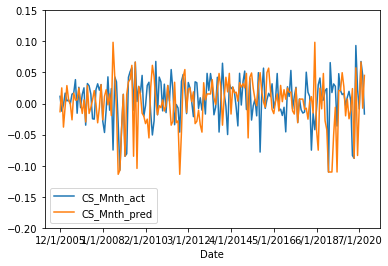

In [15]:
lines = chart.plot.line()
plt.rcParams['figure.figsize'] = [14,10]
plt.ylim(bottom = -0.2, top = 0.15)


In [16]:
sector = 'CS_Mnth'
cols = data.drop(['Date'], axis=1).columns
cols

Index(['CS_Mnth', 'CS_Qtr', 'CS_Ann', 'CD_Mnth', 'CD_Qtr', 'CD_Ann',
       'Enrgy_Mnth', 'Enrgy_Qtr', 'Enrgy_Ann', 'Fncl_Mnth', 'Fncl_Qtr',
       'Fncl_Ann', 'HlthC_Mnth', 'HlthC_Qtr', 'HlthC_Ann', 'Indstrl_Mnth',
       'Indstrl_Qtr', 'Indstrl_Ann', 'Mtrls_Mnth', 'Mtrls_Qtr', 'Mtrls_Ann',
       'Tech_Mnth', 'Tech_Qtr', 'Tech_Ann', 'Util_Mnth', 'Util_Qtr',
       'Util_Ann', 'Unempl', 'Jobs_Non-Farm (000s)', 'Hrly_Wages', 'CPI_urban',
       'PPI_Commodity', 'Imp_Exp _Indx', 'haircut_price', 'cardboard_pice',
       'Superbowl', 'Cosmetics_index', 'bodies', 'unidentified_bodies',
       'underwear', 'beer_prct_change'],
      dtype='object')

In [17]:
pred_balance = 100
act_balance = 100
for i in range(len(predicted)):
    if float(predicted[i][0]) >= 0:
        pred_balance = pred_balance + (actual[i]*pred_balance)
        act_balance = act_balance + (actual[i]*act_balance)
    else:
        act_balance = act_balance + (actual[i]*act_balance)
        
print(f' Assuming we buy when the model predicts a positive return and sell when the model predicts a loss:\n \
Predicted Balance: {pred_balance}, Actual Balance: {act_balance}')


 Assuming we buy when the model predicts a positive return and sell when the model predicts a loss:
 Predicted Balance: 212.13829914570843, Actual Balance: 276.21053977092913


In [18]:
Nostradamus = 100
for i in range(len(actual)):
    Nostradamus = Nostradamus + (actual[i]*Nostradamus)
    print(f'Month {i} - {Nostradamus}')
# Nostradamus

Month 0 - 101.16
Month 1 - 99.91573199999999
Month 2 - 99.7059089628
Month 3 - 101.38096823337503
Month 4 - 101.80676829995521
Month 5 - 102.40742823292494
Month 6 - 102.36646526163177
Month 7 - 103.91219888708241
Month 8 - 105.66831504827411
Month 9 - 109.73654517763266
Month 10 - 108.02465507286159
Month 11 - 110.85490103577057
Month 12 - 110.12325868893448
Month 13 - 111.75308291753072
Month 14 - 114.58043591534425
Month 15 - 110.59303674549028
Month 16 - 114.15413252869507
Month 17 - 117.40752530576289
Month 18 - 119.20386044294106
Month 19 - 116.28336586208901
Month 20 - 113.36465337895058
Month 21 - 115.89268514930117
Month 22 - 119.57807253704895
Month 23 - 122.14900109659551
Month 24 - 125.87454563004168
Month 25 - 122.27453362502249
Month 26 - 116.57654035809644
Month 27 - 115.55066680294519
Month 28 - 120.51934547547182
Month 29 - 119.22978847888427
Month 30 - 122.10322638122538
Month 31 - 112.96990504790972
Month 32 - 117.81631397446505
Month 33 - 121.92810333217388
Month 34

In [19]:
actual

[0.0116,
 -0.0123,
 -0.0021,
 0.0168,
 0.0042,
 0.0059,
 -0.0004,
 0.0151,
 0.0169,
 0.0385,
 -0.0156,
 0.0262,
 -0.0066,
 0.0148,
 0.0253,
 -0.0348,
 0.0322,
 0.0285,
 0.0153,
 -0.0245,
 -0.0251,
 0.0223,
 0.0318,
 0.0215,
 0.0305,
 -0.0286,
 -0.0466,
 -0.0088,
 0.043,
 -0.0107,
 0.0241,
 -0.0748,
 0.0429,
 0.0349,
 -0.0323,
 -0.1072,
 -0.0403,
 0.0148,
 -0.0848,
 -0.0808,
 0.0422,
 0.0515,
 0.0575,
 -0.0107,
 0.0667,
 0.0032,
 0.0275,
 0.0173,
 0.0453,
 -0.0204,
 -0.0034,
 0.0292,
 0.0343,
 -0.0143,
 -0.0506,
 -0.0278,
 0.0678,
 -0.018000000000000002,
 0.0426,
 0.0348,
 -0.0118,
 0.0312,
 -0.0146,
 0.028999999999999998,
 0.004,
 0.0547,
 0.0212,
 -0.0341,
 -0.0016,
 -0.0071,
 -0.046,
 0.0356,
 0.0468,
 0.0228,
 -0.0162,
 0.0339,
 0.025,
 0.0029,
 -0.0211,
 0.035,
 0.0335,
 -0.0078,
 0.0093,
 -0.0106,
 0.0155,
 -0.0169,
 0.0486,
 0.021,
 0.0483,
 0.0292,
 -0.0181,
 -0.006,
 0.0423,
 -0.0459,
 0.0023,
 0.0649,
 0.0158,
 -0.0042,
 -0.0499,
 0.0319,
 0.0238,
 0.0265,
 0.0183,
 -0.006,
 -

In [20]:
# chart function
def getchart(sector):
    plots_data=data.drop(['Date'], axis=1)
    cols = data.drop(['Date'], axis=1).columns
    inputs = []
    for i in range(len(cols)):
        inputs.append(cols[i])

    input_df=plots_data[inputs]
    target_df=plots_data[sector]
    predicted=[]
    from sklearn.tree import DecisionTreeRegressor
    initial_train=84
    num_runs=len(input_df)-initial_train
    for each_cycle in range(num_runs):
        dtr=DecisionTreeRegressor()
        dtr.fit(input_df.iloc[:initial_train+each_cycle, :], target_df[1:initial_train+1+each_cycle])
        prediction=dtr.predict([input_df.iloc[initial_train+each_cycle, :]])
#         print(f'Predict: {prediction} when actual is {target_df[initial_train+each_cycle]}')
        predicted.append(prediction)
    
    predictions = []
    for i in range (len(predicted)):
        x = predicted[i][0]
        predictions.append(x)
        
    Date = (data['Date'][initial_train:])
    Sector = (data[sector][initial_train:])
    
    Actual = []
    for i in range(initial_train, len(data)):
        x = Sector[i]
        Actual.append(x)
        
    Chart = pd.DataFrame({
        'Actual': Actual,
        'Predicted': predictions,
        }, index = Date)
    
    line = Chart.plot.line()
    plt.rcParams['figure.figsize'] = [16, 8]
#     plt.ylim(bottom = -0.2, top = 0.15)

   
    return line

In [21]:
def PredictReturn(sector):
    plots_data=data.drop(['Date'], axis=1)
    cols = data.drop(['Date'], axis=1).columns
    inputs = []
    for i in range(len(cols)):
        inputs.append(cols[i])

    input_df=plots_data[inputs]
    target_df=plots_data[sector]
    predicted=[]
    from sklearn.tree import DecisionTreeRegressor
    initial_train=84
    num_runs=len(input_df)-initial_train
    for each_cycle in range(num_runs):
        dtr=DecisionTreeRegressor()
        dtr.fit(input_df.iloc[:initial_train+each_cycle, :], target_df[1:initial_train+1+each_cycle])
        prediction=dtr.predict([input_df.iloc[initial_train+each_cycle, :]])
#         print(f'Predict: {prediction} when actual is {target_df[initial_train+each_cycle]}')
        predicted.append(prediction)
    
    predictions = []
    for i in range (len(predicted)):
        x = predicted[i][0]
        predictions.append(x)
        
    Date = (data['Date'][initial_train:])
    Sector = (data[sector][initial_train:])
    
    Actual = []
    for i in range(initial_train, len(data)):
        x = Sector[i]
        Actual.append(x)
        
    #     calculate actual vs predicted return
    pred_balance = 100
    act_balance = 100
    Nostradamus = 100
    for i in range(len(predicted)):
        act_balance = act_balance + (Actual[i]*act_balance)
        if float(predicted[i][0]) >= 0:
            pred_balance = pred_balance + (Actual[i]*pred_balance)
        if float(Actual[i]) >= 0:
            Nostradamus = Nostradamus + (Actual[i]*Nostradamus)

    print(f'Predicting the returns:\n\
    Assuming we buy when the model predicts a positive return and sell when the model predicts a loss-\n \
    Predicted Balance: {pred_balance}, Actual Balance: {act_balance}, Nostradamus: {Nostradamus}')


In [22]:
PredictReturn('CS_Mnth')

Predicting the returns:
    Assuming we buy when the model predicts a positive return and sell when the model predicts a loss-
     Predicted Balance: 244.44391378260525, Actual Balance: 276.21053977092913, Nostradamus: 2065.0259478322387


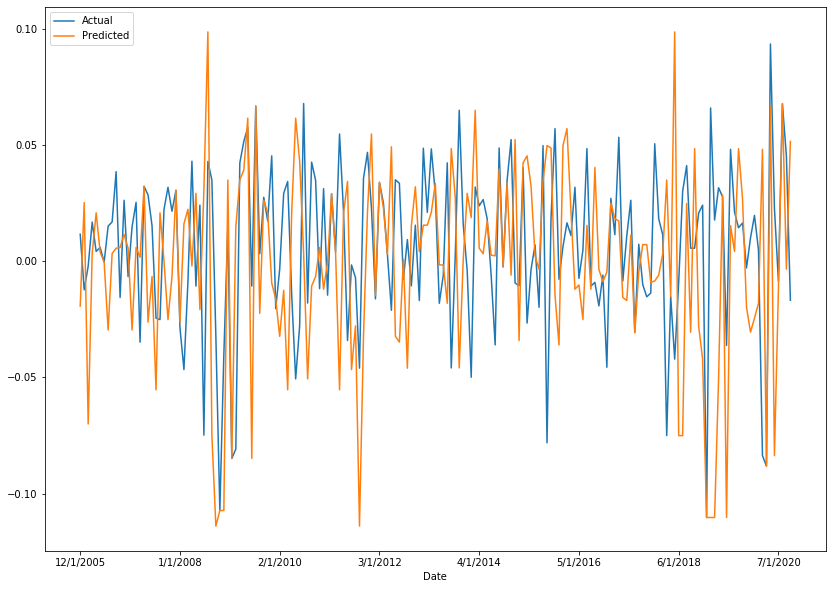

In [23]:
getchart('CS_Mnth')
plt.savefig('assets/Util_Mnth.png', bbox_inches='tight')

In [24]:
PredictReturn('CD_Mnth')

Predicting the returns:
    Assuming we buy when the model predicts a positive return and sell when the model predicts a loss-
     Predicted Balance: 413.2655457794701, Actual Balance: 465.387642860411, Nostradamus: 8610.934572549593


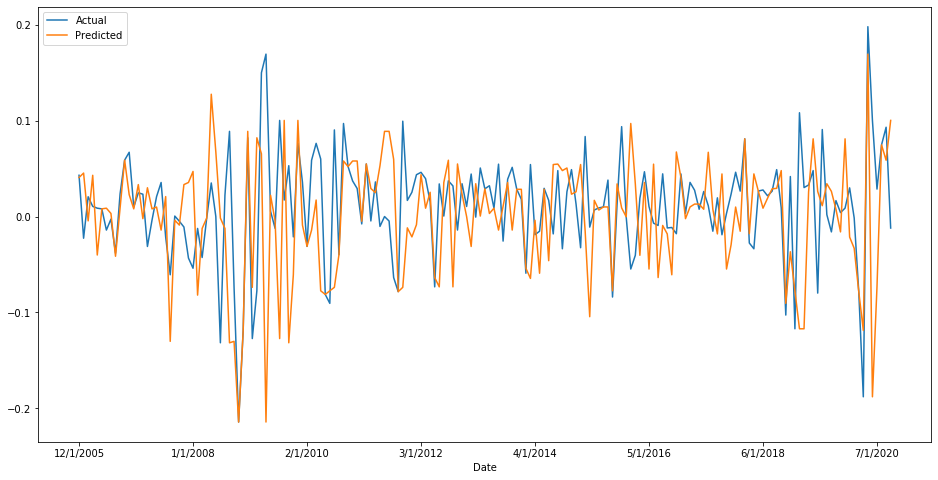

In [25]:
getchart('CD_Mnth')

In [26]:
PredictReturn('Enrgy_Mnth')

Predicting the returns:
    Assuming we buy when the model predicts a positive return and sell when the model predicts a loss-
     Predicted Balance: 317.5374931618063, Actual Balance: 61.01298592912914, Nostradamus: 10618.133903999853


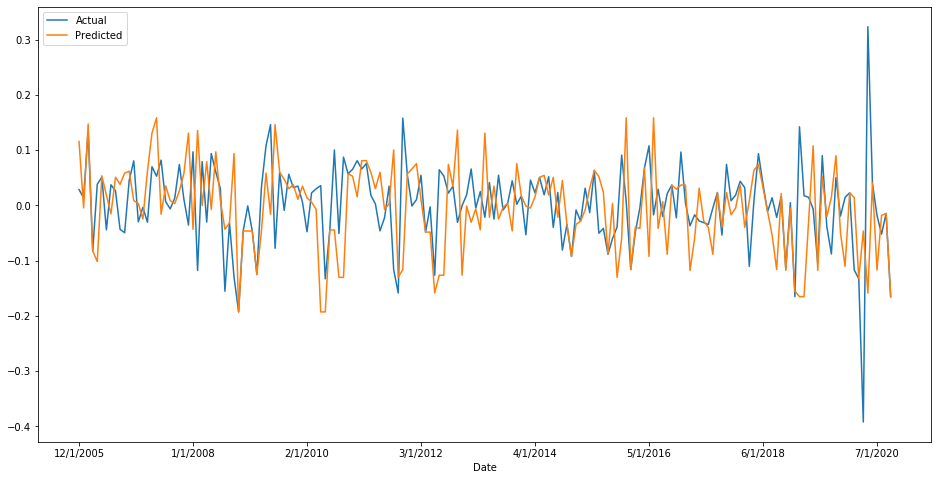

In [27]:
getchart('Enrgy_Mnth')

In [28]:
PredictReturn('Tech_Mnth')

Predicting the returns:
    Assuming we buy when the model predicts a positive return and sell when the model predicts a loss-
     Predicted Balance: 422.70541558300476, Actual Balance: 580.3319001396883, Nostradamus: 10857.02844391785


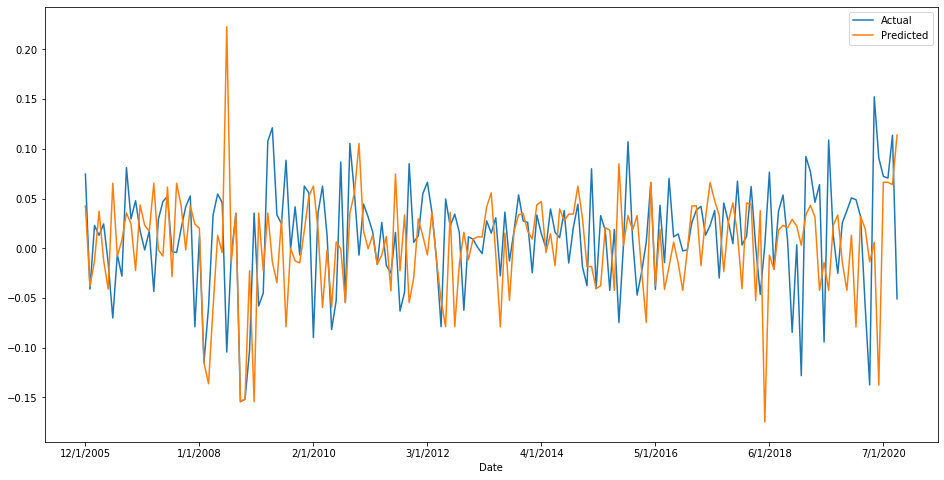

In [29]:
getchart('Tech_Mnth')

In [30]:
PredictReturn('Fncl_Mnth')

Predicting the returns:
    Assuming we buy when the model predicts a positive return and sell when the model predicts a loss-
     Predicted Balance: 98.03745833979198, Actual Balance: 97.78119611131282, Nostradamus: 8814.225353786049


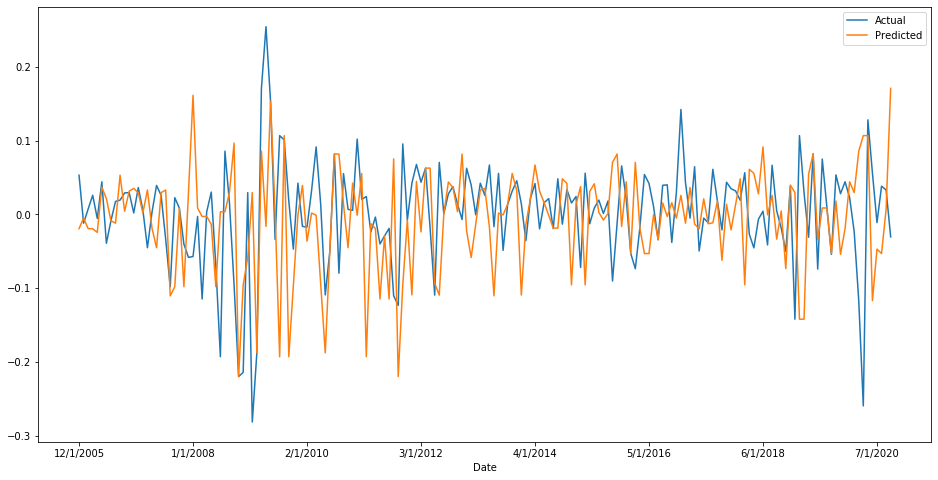

In [31]:
getchart('Fncl_Mnth')

In [32]:
PredictReturn('HlthC_Mnth')

Predicting the returns:
    Assuming we buy when the model predicts a positive return and sell when the model predicts a loss-
     Predicted Balance: 405.9044144854876, Actual Balance: 348.07664507186644, Nostradamus: 3223.0627137589086


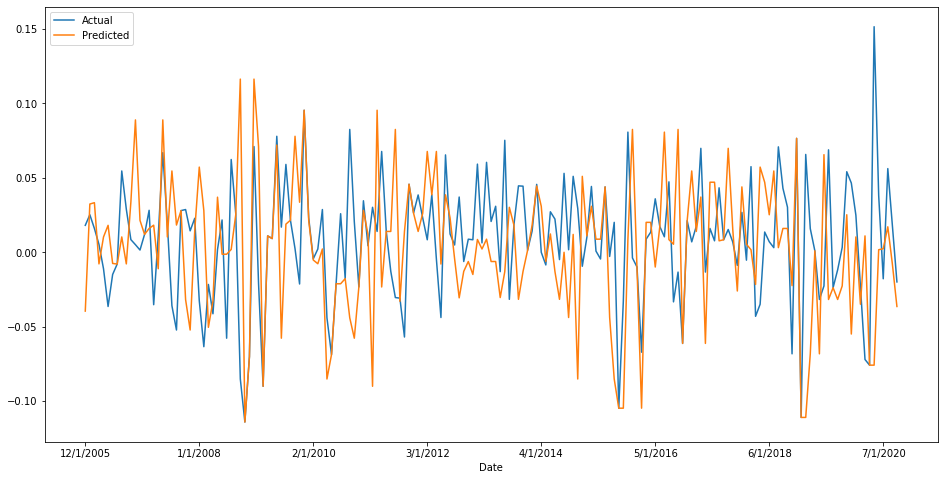

In [33]:
getchart('HlthC_Mnth')

In [34]:
PredictReturn('Indstrl_Mnth')

Predicting the returns:
    Assuming we buy when the model predicts a positive return and sell when the model predicts a loss-
     Predicted Balance: 293.96989684731267, Actual Balance: 259.71980327314736, Nostradamus: 7576.33813289993


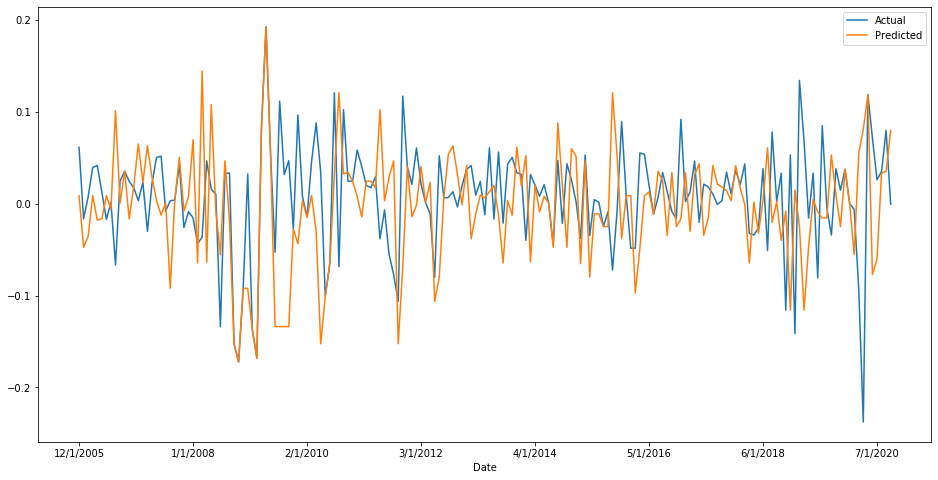

In [35]:
getchart('Indstrl_Mnth')

In [36]:
PredictReturn('Mtrls_Mnth')

Predicting the returns:
    Assuming we buy when the model predicts a positive return and sell when the model predicts a loss-
     Predicted Balance: 248.96322985875221, Actual Balance: 230.7716673192767, Nostradamus: 8420.463987340137


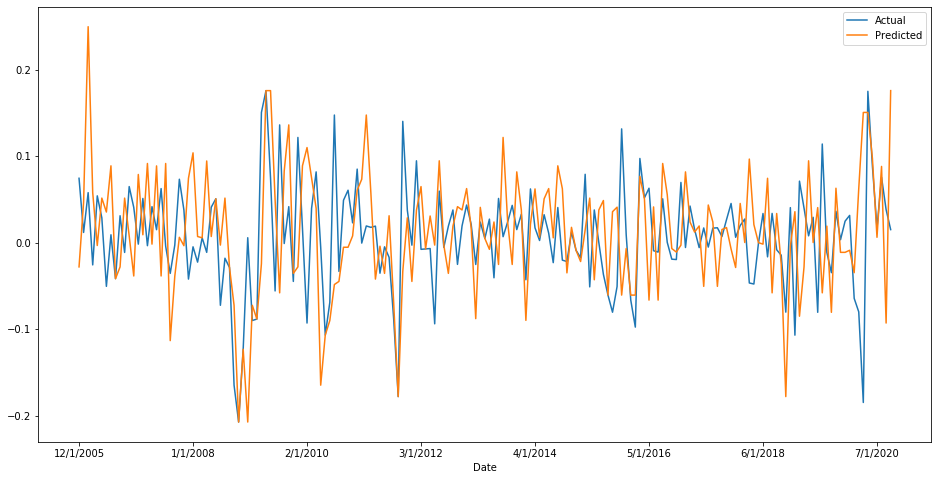

In [37]:
getchart('Mtrls_Mnth')

In [38]:
PredictReturn('Util_Mnth')

Predicting the returns:
    Assuming we buy when the model predicts a positive return and sell when the model predicts a loss-
     Predicted Balance: 361.34737248555314, Actual Balance: 188.6133675627273, Nostradamus: 2368.2861753518405


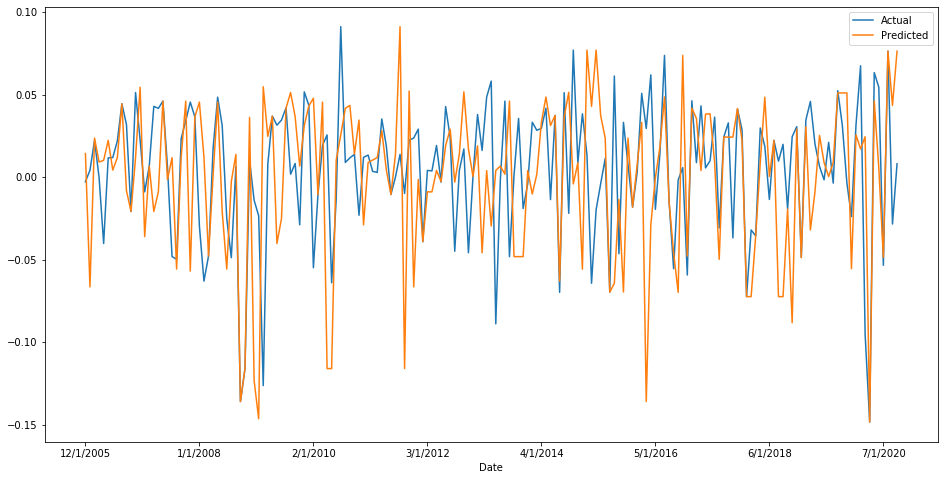

In [39]:
getchart('Util_Mnth')
plt.savefig('assets/Util_Mnth.png', bbox_inches='tight')